

# Project: INSIGHTS FROM TMDB MOVIES DATABASE


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions & limitations">Conclusions and limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this project we shall be analysing the tmdb_movies.csv dataset. The data set collates data from over 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Certain columns, like "cast" and "genres" contain multiple values seperated by pipe(|). We shall attempt to answer the following questions:
<ul>
    <li><a href="#r1">Research Question 1: Is there a relationship between the vote_average and the revenue?: </a></li>
    <li><a href="#r2">Research question 2: What levels of the vote brought about more revenue?</a></li>
    <li><a href="#r3">Research question 3: What is the mean revenue for each level of the vote averages?</a></li>
    <li><a href="#r4">Research Question 4: How has the quality and quantity of movies improved over the years?</a></li>
    <li><a href="#r5">Research question 5: What was the mean revenue expected from a movie for each decade?</a></li>
    <li><a href="#r6">Research question 6: How has the satisfaction of viewers fared by the decade?</a></li>
    



In [86]:
# Import necessary packages such as pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> We shall proceed to view what the data looks like, and what the properties of the dataset consist of like the data types, presence of missing data, and what other information we can be able to glean from the data.

### General Properties

In [87]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [88]:
# Let's proceed to see what data types the different columns are made of
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> **Points to note:**
>    1. Columns with missing data: imdb_id, cast, homepage, director, tagline, keywords, genres, production_companies
>    2. There are 10866 rows of data or movies
>    3. There are 20 columns or features
    


### Data Cleaning

In [89]:
# The budget_adj, revenue_adj need to be converted to int data types 
convert_columns = ['budget_adj', 'revenue_adj']
for c in convert_columns:
    df[c] = df[c].astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [91]:
#convert the release_date and  column to datestamp data type
df['release_date']= df['release_date'].astype('datetime64')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

Each movie has more than one cast. The cast column contains multiple names of actors for each row. We can attempt to break this column down to contain a single actor per instance. Same applies for the genres and the production companies



In [93]:
#drop rows with no cast, genre data or production_companies data
df.dropna(subset = ['cast', 'genres', 'production_companies'], inplace = True)



In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9792 non-null   int64         
 1   imdb_id               9788 non-null   object        
 2   popularity            9792 non-null   float64       
 3   budget                9792 non-null   int64         
 4   revenue               9792 non-null   int64         
 5   original_title        9792 non-null   object        
 6   cast                  9792 non-null   object        
 7   homepage              2643 non-null   object        
 8   director              9773 non-null   object        
 9   tagline               7641 non-null   object        
 10  keywords              8677 non-null   object        
 11  overview              9791 non-null   object        
 12  runtime               9792 non-null   int64         
 13  genres           

In [95]:
#Check which columns still have missing data
df.isna().sum()

id                         0
imdb_id                    4
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7149
director                  19
tagline                 2151
keywords                1115
overview                   1
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [96]:
# Let us Proceed to drop the following columns: homepage,tagline and keywords as they almost have no relevance
df.dropna(axis =1, inplace = True)

In [97]:
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [98]:
df.shape

(9792, 15)

### We save this data to aid the next level of our analysis.


In [99]:
# Save this cleaned data to tmdb_movies_v1
df.to_csv('tmdb_movies_v1.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have cleaned the data, it is time to ask pertinent questions that would help understand the relationships between the different features in the data

<a id ='r1'></a>
### Research Question 1: Is there a relationship between the vote_average and the revenue?


In [100]:
#Load the saved data
df = pd.read_csv('tmdb_movies_v1.csv')
#Let's view the distribution of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9792.000000,9792.000000,9.792000e+03,9.792000e+03,9792.000000,9792.000000,9792.000000,9792.000000,9.792000e+03,9.792000e+03
mean,63422.970690,0.693645,1.615046e+07,4.414209e+07,102.860703,238.873060,5.964890,2000.893689,1.938018e+07,5.500964e+07
std,90940.928996,1.036163,3.218566e+07,1.224795e+08,27.943064,602.474229,0.913438,13.036667,3.563991e+07,1.492116e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,-2.147484e+09
25%,10240.500000,0.231611,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18768.500000,0.419158,1.583300e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.716900e+05,0.000000e+00
75%,70697.000000,0.774969,1.900000e+07,3.083160e+07,112.000000,173.000000,6.600000,2011.000000,2.456439e+07,4.254583e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,1.907006e+09


### We need to understand the distribution of the data for the different features/columns


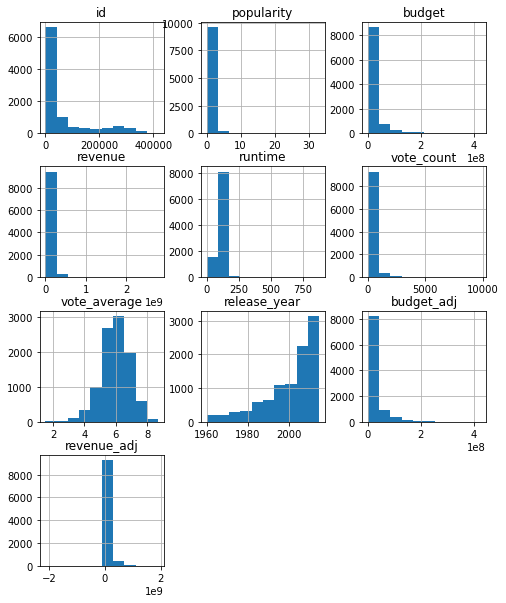

In [101]:
#We need to see the distribution of the data in graphical form
df.hist(figsize = (8,10));

We can see that the revenue_adj column contains some negative values. 

In [102]:
df.query('revenue_adj<0')

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1199,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,39575591,-2147483648
1254,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240886902,-2147483648
4645,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271692064,-2147483648
9530,9552,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,39289276,-2147483648


These data appear to be tampered with. We will be sticking with the revenue column for the purpose of this analysis. Let us proceed to examine the relationship between the average vote and revenue


Text(0.5, 1.0, 'Vote average vs Revenue')

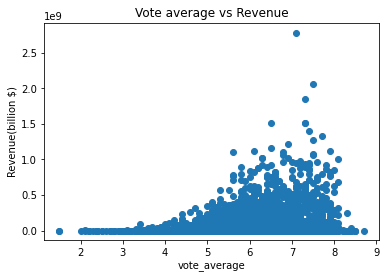

In [103]:
#Let's plot a scatter diagram between the revenue and the average vote
plt.scatter(df.vote_average, df.revenue)
plt.xlabel('vote_average')
plt.ylabel('Revenue(billion $)')
plt.title('Vote average vs Revenue')

It appears that the relationship is almost exponentially positive in nature. We can categorize the average votes into levels and compare this with the revenue each level brings.

<a id = 'r2'></a>
###  Research question 2: What levels of the vote brought about more revenue?

#To do this we divide the revenue into different levels:
- Low (lowest 25% of vote average)
- Medium (25% - 50%)
- High (50% -75%)
- Very High( > 75%)

In [104]:
# Bin edges that would be used to cut the data into groups
bin_edges = [1.5,5.4,6,6.6,8.7]
# Labels for the vote_average groups
bin_groups = ['Low','Medium','High','Very_high']


In [105]:
# Create the vote_average groups
df['vote_average_gps'] = pd.cut(df['vote_average'],bin_edges, labels = bin_groups)
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_average_gps
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,High
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,Very_high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,High
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,Very_high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,Very_high


In [106]:
# Find the mean revenue of each vote_average group with groupby
df.groupby(['vote_average_gps'])['revenue'].mean()

vote_average_gps
Low          1.447905e+07
Medium       3.791468e+07
High         5.405308e+07
Very_high    7.426772e+07
Name: revenue, dtype: float64

Define a function that returns the groupby method and bar chart of the groupby method 

In [107]:
def groupby_mean(dataframe,a,b):
    grouped = dataframe.groupby([a]).mean()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(a + ' vs ' + b)

def groupby_count(dataframe,a,b):
    grouped = dataframe.groupby([a]).count()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b +' count')
    plt.title(a + ' vs ' + b)

def groupby_sum(dataframe,a,b):
    grouped = dataframe.groupby([a]).sum()[[b]]
    print(grouped)
    grouped.plot(kind = 'bar')
    plt.xlabel(a)
    plt.ylabel(b + ' sum')
    plt.title(a + ' vs ' + b)

    
    

<a id= 'r3'></a>
### Research question 3: what is the mean revenue for each level of the vote averages?

                       revenue
vote_average_gps              
Low               1.447905e+07
Medium            3.791468e+07
High              5.405308e+07
Very_high         7.426772e+07


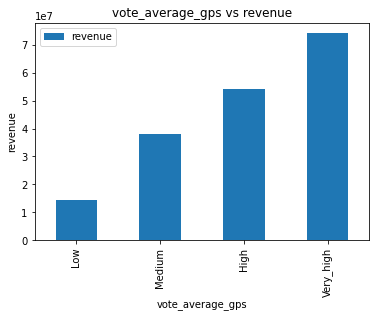

In [108]:
groupby_mean(df,'vote_average_gps','revenue')

<a id='r4'></a>
### Research Question 4: How has the quality and quantity of movies improved over the years?

To answer this question,let's see the distribution of movies(revenue and revenue) over the years


               id
release_year     
1960           32
1961           30
1962           30
1963           34
1964           41
1965           34
1966           44
1967           37
1968           37
1969           29
1970           40
1971           55
1972           37
1973           55
1974           44
1975           42
1976           46
1977           55
1978           61
1979           56
1980           73
1981           78
1982           80
1983           77
1984           99
1985          106
1986          109
1987          113
1988          132
1989          128
1990          126
1991          125
1992          126
1993          173
1994          174
1995          170
1996          196
1997          180
1998          191
1999          212
2000          196
2001          212
2002          241
2003          254
2004          253
2005          323
2006          350
2007          390
2008          443
2009          477
2010          422
2011          456
2012          500
2013      

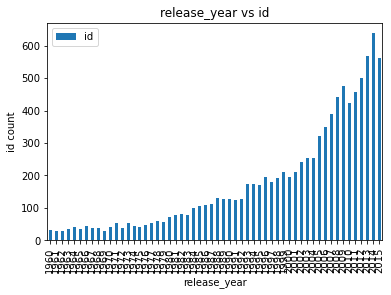

In [109]:
groupby_count(df,'release_year','id')

We can see that movies are released exponentially with the passing of each year.
The above visual representation seems to be too cramped up together. We shall proceed to view the distribution on a decade by decade basis.


In [110]:
# Distribution of the quality of movies by each decade (five and a half decades)
# The expectation is quality of movies increases with each decade and so does the revenue
Decades = ['first','second','third','fourth',
          'fifth', 'five-and-half']
years = [1960,1970,1980,1990,2000,2010,2020]
df['decade'] = pd.cut(df['release_year'],years,labels = Decades)
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_average_gps,decade
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892,High,five-and-half
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292,Very_high,five-and-half
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955,271619025,High,five-and-half
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919,1902723129,Very_high,five-and-half
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923,1385748801,Very_high,five-and-half


                    revenue
decade                     
first            3431252010
second          11682084385
third           32720621883
fourth          84692639700
fifth          175454930698
five-and-half  124112806632


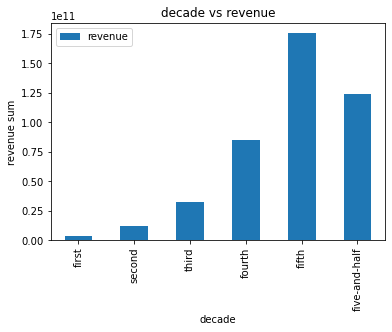

In [111]:
groupby_sum(df,'decade','revenue')

Let us compare this with the amount of movies released in each decade


                 id
decade             
first           356
second          524
third          1048
fourth         1743
fifth          3365
five-and-half  2724


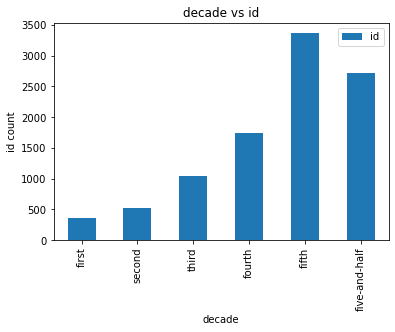

In [112]:
groupby_count(df,'decade','id')

What we can tell here is that there has been an exponential increase of movies per decade. The reason for the decline in the revenue for the sixth decade might arise from the fact that it stops in 2015 instead of 2019. Four more years to make it a decade. Let us also consider the percentage increase in the amount of movies released per decade.


In [113]:
movie_count_per_decade['percentage_change'] = movie_count_per_decade['id'].pct_change()*100
movie_count_per_decade

,id,percentage_change
decade,,
first,356,NaN
second,524,47.191011
third,1048,100.000000
fourth,1743,66.316794
fifth,3365,93.057946
five-and-half,2724,-19.049034


<a id='r5'></a>
### Research question 5: What was the mean revenue expected from a movie for each decade?

                    revenue
decade                     
first          9.638348e+06
second         2.229405e+07
third          3.122197e+07
fourth         4.859015e+07
fifth          5.214114e+07
five-and-half  4.556270e+07


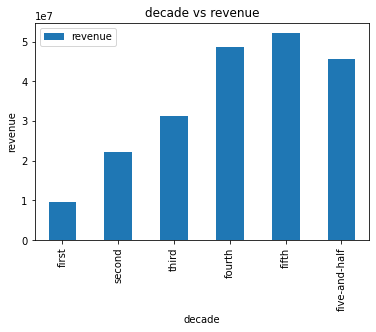

In [114]:
groupby_mean(df,'decade','revenue')

Something more is at play here. The mean revene from each decade appears to have decrease in the rate of change. Let us see the percentage change for each decade

In [115]:
rev_decade_mean['percentage_change'] = rev_decade_mean['revenue'].pct_change()*100
rev_decade_mean

,revenue,percentage_change
decade,,
first,9.638348e+06,NaN
second,2.229405e+07,131.305753
third,3.122197e+07,40.046163
fourth,4.859015e+07,55.628100
fifth,5.214114e+07,7.308031
five-and-half,4.556270e+07,-12.616591


As Predicted, there appears to be a significant drop in the fifth decade( 2000 - 2010). And after five years into the sixth decade, the percentage change is still in the negative. This could be due to an overall dissatisfaction with the movies produced from the year 2000.

<a id='r6'></a>
### Research question 6: How has the satisfaction of viewers fared by the decade?

               vote_average
decade                     
first              6.277247
second             6.340840
third              6.063740
fourth             5.987263
fifth              5.916582
five-and-half      5.854846


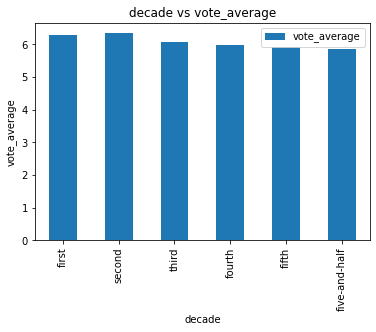

In [116]:
groupby_mean(df,'decade','vote_average')

There appears to be a gradual decline in the consumer satisfaction of movies as postulated previously. 
We shall proceed to save this data to 'tmdb_movies_v2.csv' for future purposes.

In [117]:
#Save this dataset to tmdb_movies_v2
df.to_csv('tmdb_movies_v2.csv', index = False)

<a id='conclusions & limitations'></a>
## Conclusions

From the explorative analysis done, here are the findings:
>  1. There has been an explosion in the production of movies for the past three decades(from the 1980's). Possibly owing to the advances in technology.
>  2. Although there has been an increase in the revenue generated per decade, overall consumer satisfaction from movies seem to be on the decline.
    



<a id='conclusions & limitations'></a>
## Limitations

From the explorative analysis done, here are the findings:
> 1. There is need to consider what genre's might be contributing to this dissatisfaction/satisfaction. Hence further in depth research needs to be performed on a genre-by-genre basis.

>2. The revenue adjusted column showed some miscalculations and as such handicapped the use of the column which was intended to take rate of inflation into account.




In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset_v2.ipynb'])

1